In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
  

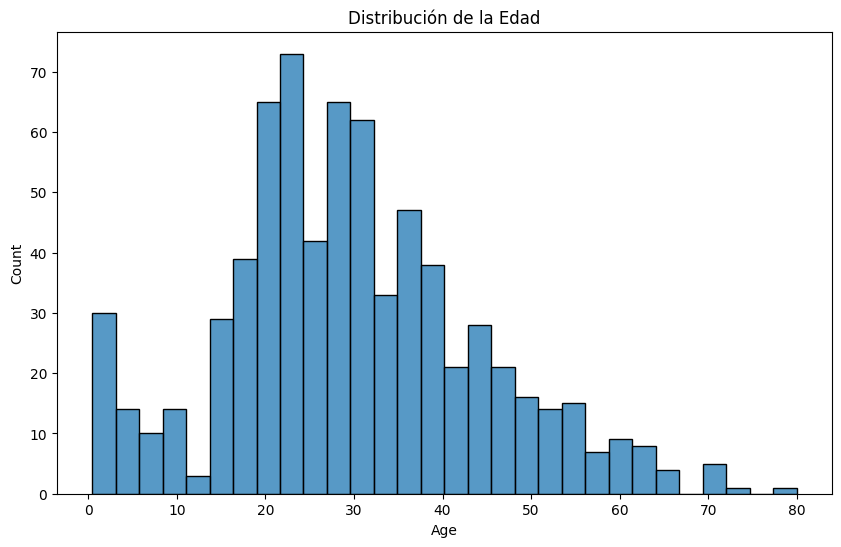

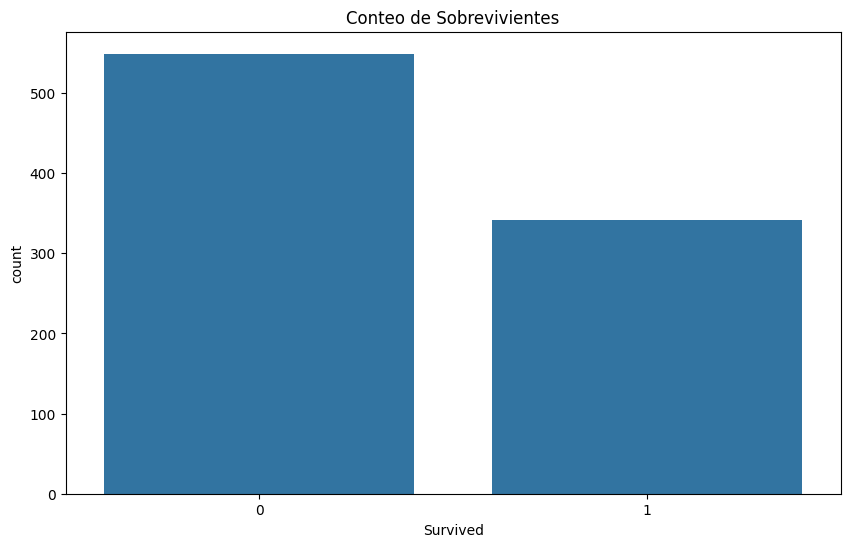

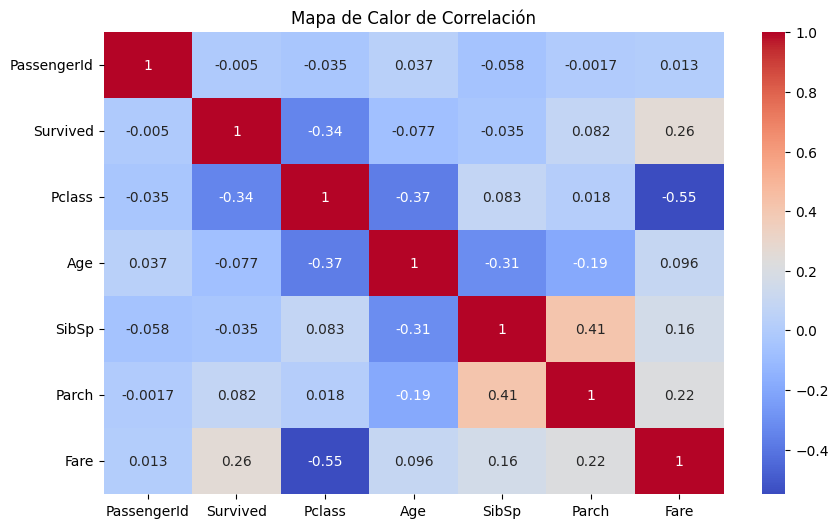

In [2]:
# Cargar los datos
df = pd.read_csv('./Titanic-Dataset.csv')

# Mostrar algunas filas del dataframe
print(df.head())

# Descripción estadística de los datos
print(df.describe())

# Distribución de la edad
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'].dropna(), kde=False, bins=30)
plt.title('Distribución de la Edad')
plt.show()

# Conteo de sobrevivientes
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Survived')
plt.title('Conteo de Sobrevivientes')
plt.show()

# Selección de solo columnas numéricas para el mapa de calor de correlación
numeric_cols = df.select_dtypes(include=[np.number]).columns

# Mapa de calor de correlación
plt.figure(figsize=(10, 6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Mapa de Calor de Correlación')
plt.show()

In [3]:
# 2. Preprocesamiento de los Datos
# Manejo de valores faltantes
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df.drop(columns=['Cabin'], inplace=True)

# Convertir variables categóricas a numéricas
label_encoder = LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])
df['Embarked'] = label_encoder.fit_transform(df['Embarked'])

In [4]:
# 3. Selección de Características
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X = df[features]
y = df['Survived']

In [5]:
# 4. División del Dataset en Train y Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
# 5. Entrenamiento del Modelo
# Entrenamiento del Modelo
tree = DecisionTreeClassifier(random_state=42)
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10]
}
grid_search = GridSearchCV(tree, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_tree = grid_search.best_estimator_


In [ ]:
# 6. Evaluación del Desempeño del Modelo
y_pred = best_tree.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

classification_report_str = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_report_str)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Accuracy:  0.7988826815642458
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.90      0.84       105
           1       0.83      0.65      0.73        74

    accuracy                           0.80       179
   macro avg       0.81      0.78      0.78       179
weighted avg       0.80      0.80      0.79       179

Confusion Matrix:
 [[95 10]
 [26 48]]


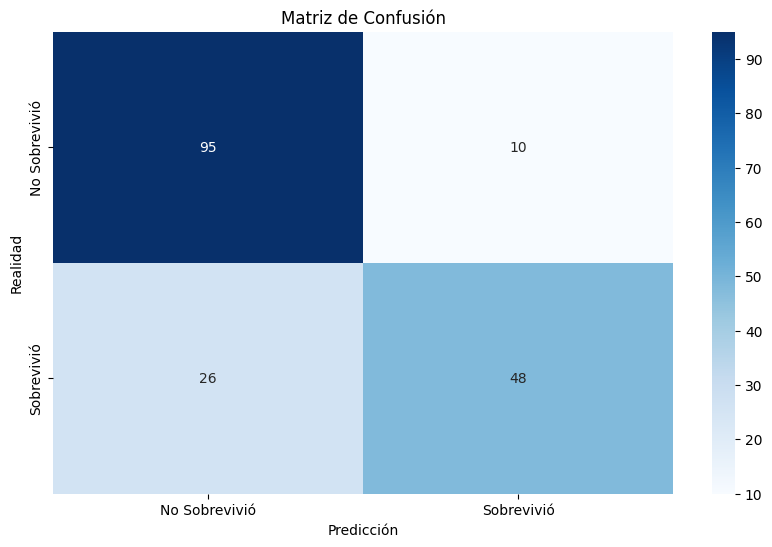

Importancia de características:
 Sex         0.532237
Pclass      0.185373
Fare        0.153541
Age         0.110880
Embarked    0.017969
SibSp       0.000000
Parch       0.000000
dtype: float64


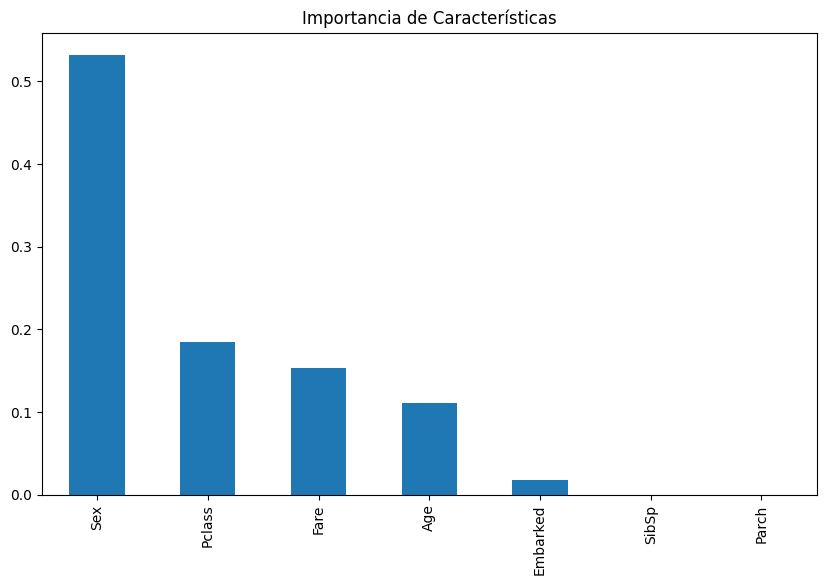

In [ ]:
# 7. Visualización de Resultados
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Sobrevivió', 'Sobrevivió'], yticklabels=['No Sobrevivió', 'Sobrevivió'])
plt.xlabel('Predicción')
plt.ylabel('Realidad')
plt.title('Matriz de Confusión')
plt.show()

feature_importances = pd.Series(best_tree.feature_importances_, index=features).sort_values(ascending=False)
print("Importancia de características:\n", feature_importances)

plt.figure(figsize=(10, 6))
feature_importances.plot(kind='bar')
plt.title('Importancia de Características')
plt.show()

In [ ]:
# Interpretación de resultados
analysis = f"""
El análisis del modelo de Árbol de Decisión proporciona una visión completa del rendimiento del modelo en la tarea de clasificar a los pasajeros del 
Titanic en sobrevivientes y no sobrevivientes. Con un accuracy del {accuracy * 100:.2f}%, el modelo es capaz de 
clasificar correctamente alrededor del {accuracy * 100:.2f}% de los pasajeros en el conjunto de prueba.

El reporte de clasificación ofrece una descripción detallada del desempeño del modelo para cada clase. 
uestra que el modelo tiene una alta precisión y recall para la clase de pasajeros no sobrevivientes, pero un recall 
ligeramente menor para la clase de pasajeros sobrevivientes. La matriz de confusión ilustra cómo el modelo clasificó l
as muestras en cada clase, mostrando que la mayoría fueron correctamente clasificadas como no sobrevivientes, pero hubo 
algunas clasificadas incorrectamente como sobrevivientes y viceversa.

La importancia de características revela que las variables más influyentes son {feature_importances.index[0]} y {feature_importances.index[1]}, lo que
 sugiere que estos factores son significativos en la predicción de la supervivencia de un pasajero.

En resumen, el modelo de Árbol de Decisión proporciona una herramienta valiosa para predecir la 
supervivencia de los pasajeros del Titanic con una precisión razonable, pero hay margen para mejorar 
su desempeño, especialmente en términos de recall para la clase de pasajeros sobrevivientes. Esto podría 
lograrse mediante la optimización adicional del modelo o la exploración de diferentes algoritmos de 
aprendizaje automático.
"""
print(analysis)



El análisis del modelo de Árbol de Decisión proporciona una visión completa del rendimiento del modelo en la tarea de clasificar a los pasajeros del 
Titanic en sobrevivientes y no sobrevivientes. Con un accuracy del 79.89%, el modelo es capaz de 
clasificar correctamente alrededor del 79.89% de los pasajeros en el conjunto de prueba.

El reporte de clasificación ofrece una descripción detallada del desempeño del modelo para cada clase. 
uestra que el modelo tiene una alta precisión y recall para la clase de pasajeros no sobrevivientes, pero un recall 
ligeramente menor para la clase de pasajeros sobrevivientes. La matriz de confusión ilustra cómo el modelo clasificó l
as muestras en cada clase, mostrando que la mayoría fueron correctamente clasificadas como no sobrevivientes, pero hubo 
algunas clasificadas incorrectamente como sobrevivientes y viceversa.

La importancia de características revela que las variables más influyentes son Sex y Pclass, lo que
 sugiere que estos factores s